In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import json
import ssl
from urllib.request import urlopen
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np

#enable ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [ ]:
#  Load data
df = pd.read_csv('shopping_behavior_updated.csv')

# Load Geo json 
with urlopen('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json') as response:
    us_states = json.load(response)

In [2]:

#map state
state_counts = df['Location'].value_counts().reset_index()
state_counts.columns = ['state', 'count']
state_count_dict = dict(zip(state_counts['state'], state_counts['count']))

#calculate centroid
def calculate_centroid(coords):
    x = [p[0] for p in coords]
    y = [p[1] for p in coords]
    return sum(x) / len(coords), sum(y) / len(coords)

In [ ]:
# prepare, set property for plot
fig, ax = plt.subplots(figsize=(20, 12))

vmin = min(state_count_dict.values()) if state_count_dict else 0
vmax = max(state_count_dict.values()) if state_count_dict else 1
norm = plt.Normalize(vmin=vmin, vmax=vmax)

patches = []
for state in us_states['features']:
    state_name = state['properties']['name']
    count = state_count_dict.get(state_name, 0)

    if state['geometry']['type'] == 'Polygon':
        coords = state['geometry']['coordinates'][0]
    elif state['geometry']['type'] == 'MultiPolygon':
        coords = state['geometry']['coordinates'][0][0]
    
    patch = Polygon(coords, closed=True)
    patches.append(patch)
    
    centroid = calculate_centroid(coords)
    ax.annotate(state_name, xy=centroid, ha='center', va='center', fontsize=6)

pc = PatchCollection(patches, edgecolor='white', linewidth=0.5)
pc.set_array(np.array([state_count_dict.get(state['properties']['name'], 0) for state in us_states['features']]))
pc.set_cmap('Blues')
pc.set_norm(norm)
ax.add_collection(pc)

ax.set_aspect('equal')

ax.axis('off')

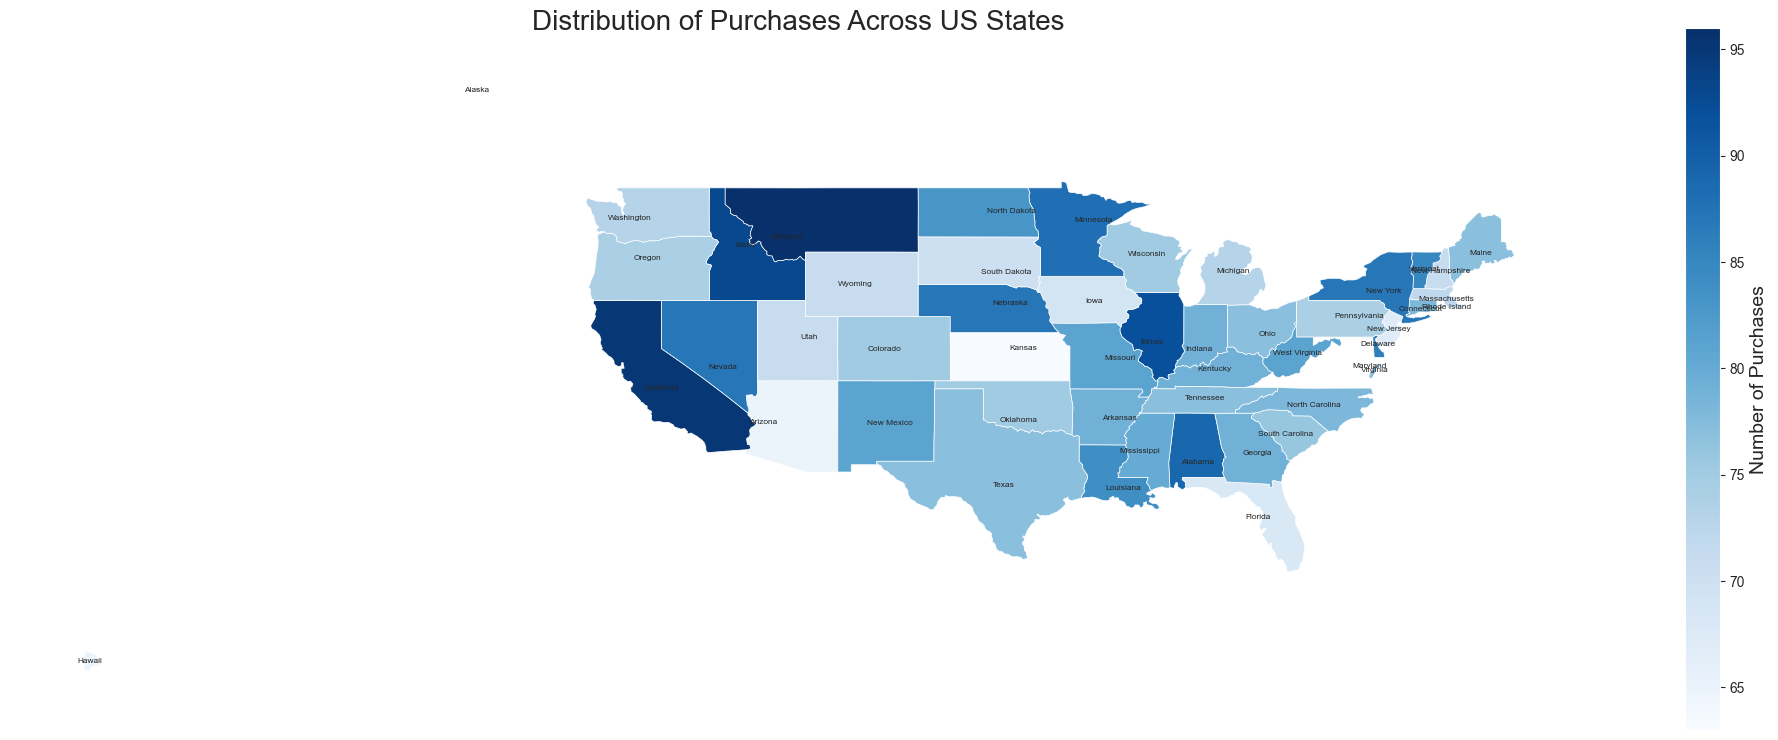

In [3]:
#plot
plt.title('Distribution of Purchases Across US States', fontsize=20, pad=20)

cbar = plt.colorbar(pc, ax=ax, shrink=0.6)
cbar.set_label('Number of Purchases', fontsize=14)

ax.autoscale_view()
plt.tight_layout()

plt.show()
